In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from PIL import Image
import requests
pd.set_option('max_colwidth', 1000)

In [ ]:
books = pd.read_csv('/content/drive/MyDrive/BookRecommenderSystem/Books.csv')
users = pd.read_csv('/content/drive/MyDrive/BookRecommenderSystem/Users.csv')
ratings = pd.read_csv('/content/drive/MyDrive/BookRecommenderSystem/Ratings.csv')

In [ ]:
display(books.head(10))
print("Books Data Set : Records {} and Features {}\n".format(books.shape[0],books.shape[1]))
print("Duplicate Records?",books.duplicated().sum())
print("\nNull Values?")
books.isnull().sum()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0399135782.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0399135782.01.LZZZZZZZ.jpg
6,0425176428,What If?: The World's Foremost Military Historians Imagine What Might Have Been,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0425176428.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0425176428.01.LZZZZZZZ.jpg
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671870432.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671870432.01.LZZZZZZZ.jpg
8,0679425608,Under the Black Flag: The Romance and the Reality of Life Among the Pirates,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0679425608.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0679425608.01.LZZZZZZZ.jpg
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.LZZZZZZZ.jpg


Books Data Set : Records 271360 and Features 8

Duplicate Records? 0

Null Values?


ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
display(users.head(1))
print("Users Data Set : Records {} and Features {}\n".format(users.shape[0],users.shape[1]))
print("Duplicate Records?",users.duplicated().sum())
print("\nNull Values?")
users.isnull().sum()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN


Users Data Set : Records 278858 and Features 3

Duplicate Records? 0

Null Values?


User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
display(ratings.head(10))
print("Ratigs Data Set : Records {} and Features {}\n".format(ratings.shape[0],ratings.shape[1]))
print("Duplicate Records?",ratings.duplicated().sum())
print("Null Values?")
ratings.isnull().sum()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


Ratigs Data Set : Records 1149780 and Features 3

Duplicate Records? 0
Null Values?


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
books_df = books.merge(ratings,on='ISBN')
display(books_df.head(10))

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,41385,0
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,67544,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,96054,0
8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,116866,9
9,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,123629,9


In [ ]:
def clean_booktitle(title):
    return str(title).title().strip()
    
books_df['Book-Title'] = books_df['Book-Title'].apply(clean_booktitle)

In [ ]:
'''
Due to memory contraint, retaining those records where 
1. users have voted more than 200 times
2. books that are voted more than 50 times
'''
print("Shape before filtering:",books_df.shape)
books_df = books_df[books_df['User-ID'].map(books_df['User-ID'].value_counts()) > 200]

books_df = books_df[books_df['Book-Title'].map(books_df['Book-Title'].value_counts()) > 50]

books_df = books_df.reset_index(drop=True)
print("Shape after filtering:",books_df.shape)

Shape before filtering: (1031136, 10)
Shape after filtering: (58685, 10)


In [ ]:
def get_top_N_books(books_df,n=100):
    
    rating_count = books_df.groupby('Book-Title').count()['Book-Rating'].reset_index()    
    rating_count.rename(columns={'Book-Rating':'Number_Of_Votes'},inplace=True)
    
    rating_avg = books_df.groupby('Book-Title')['Book-Rating'].mean().reset_index()    
    rating_avg.rename(columns={'Book-Rating':'Ratings-Average'},inplace=True)
    
    popular_books = rating_count.merge(rating_avg,on='Book-Title')
    
    def weighted_rate(x):
        v = x['Number_Of_Votes']
        R = x['Ratings-Average']
                
        return ((v * R) + (m*C))/(v+m)

    C = popular_books['Ratings-Average'].mean()
    m = popular_books['Number_Of_Votes'].quantile(0.90)
    
    # Filter out all qualified books into a new DataFrame
    popular_books = popular_books[popular_books['Number_Of_Votes'] >= m]
    
    popular_books['Polularity-Score'] = popular_books.apply(weighted_rate,axis=1)
    
    popular_books = popular_books.sort_values(by='Polularity-Score',ascending=False)

    return popular_books[['Book-Title','Ratings-Average','Number_Of_Votes','Polularity-Score']].reset_index(drop=True).head(n)

n =10
print("Top {} popular books".format(n))
display(get_top_N_books(books_df,10))

Top 10 popular books


,Book-Title,Ratings-Average,Number_Of_Votes,Polularity-Score
0,Harry Potter And The Prisoner Of Azkaban (Book 3),4.414815,135,3.202962
1,Harry Potter And The Chamber Of Secrets (Book 2),3.988636,176,3.120212
2,To Kill A Mockingbird,3.690608,181,2.960723
3,A Wrinkle In Time,3.723077,130,2.833788
4,The Lovely Bones: A Novel,3.203065,261,2.784616
5,Harry Potter And The Sorcerer'S Stone (Harry Potter (Paperback)),3.316384,177,2.735456
6,The Da Vinci Code,3.157407,216,2.701690
7,The Red Tent (Bestselling Backlist),3.083832,167,2.585134
8,The Secret Life Of Bees,2.848039,204,2.496362
9,"Tuesdays With Morrie: An Old Man, A Young Man, And Life'S Greatest Lesson",3.000000,139,2.489907


In [ ]:
data_matrix = books_df.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
data_matrix.fillna(0,inplace=True)
display(data_matrix)

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1St To Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2Nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend In The Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year Of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen And The Art Of Motorcycle Maintenance: An Inquiry Into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
similarity_scores_books = cosine_similarity(data_matrix)
display(similarity_scores_books)

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

You read "The Brethren" by JOHN GRISHAM


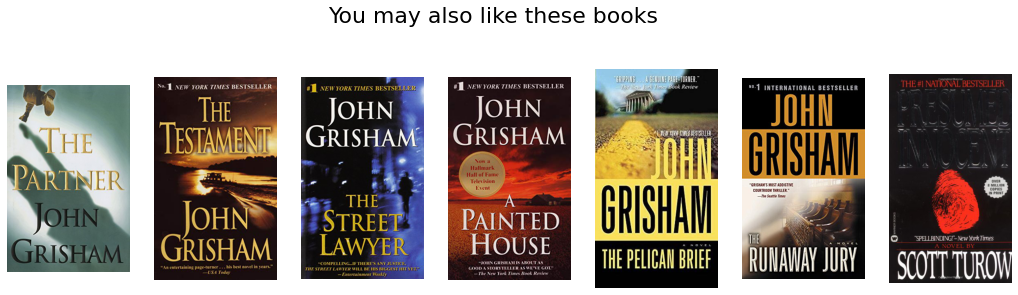

You read "Wild Animus" by Rich Shapero


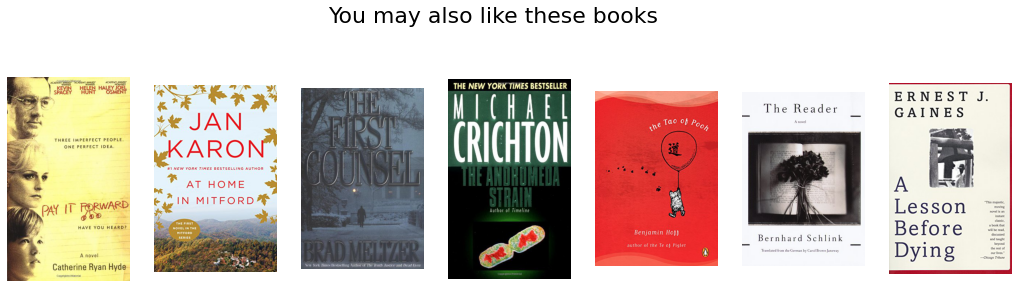

You read "The Bonesetter'S Daughter" by Amy Tan


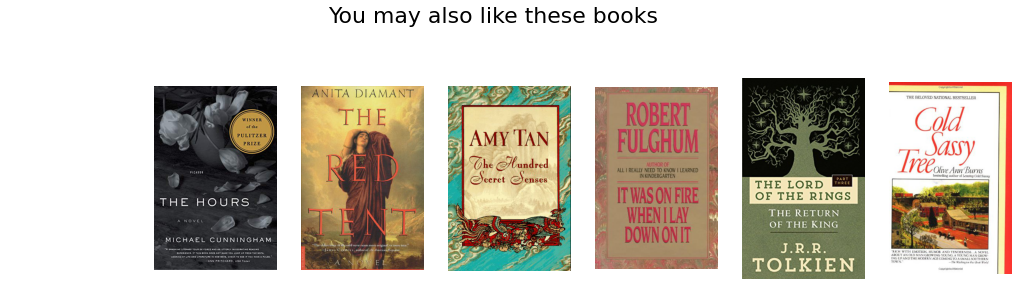

You read "Tara Road" by Maeve Binchy


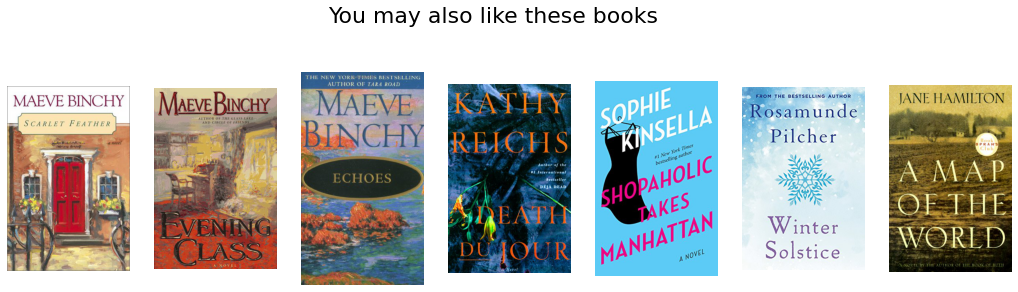

In [ ]:
def recommend_books(books_df,book_name):
    
    if books_df['Book-Title'].str.contains(book_name).any()==False:
        return -1
        
    index = np.where(data_matrix.index==book_name)[0][0]

    similar_items = list(enumerate(similarity_scores_books[index]))
    similar_items = sorted(similar_items,key = lambda x:x[1],reverse=True)[1:8]

    book_recommend = []
    for i in similar_items:
        temp_df = books_df[books_df['Book-Title'] == data_matrix.index[i[0]]]
        book_recommend.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))       
    return book_recommend
        
    
for i in range(5):
    title = random.choice(books_df['Book-Title'])

    book_recommend = recommend_books(books_df,title)
    if book_recommend == -1:
        #print("No recommendation found")
        pass
    else:
        
        n = len(book_recommend)
        author = books_df[books_df['Book-Title']==title]['Book-Author'].values
        
        print('You read "{}" by {}'.format(title,author[0]))
        fig, axs = plt.subplots(1, n,figsize=(18,5))
        fig.suptitle('You may also like these books', size = 22)

        for i in range(n):
            
            url = books_df.loc[books_df['Book-Title'] == book_recommend[i],'Image-URL-L'][:1].values[0]
            im = Image.open(requests.get(url, stream=True).raw)
            axs[i].imshow(im)
            axs[i].axis("off")

        plt.show()   

In [ ]:
similarity_scores_users = cosine_similarity(data_matrix.T)

In [ ]:
def get_user_fav(id):
    user_rec = books_df[books_df['User-ID'] == id].sort_values(['Book-Rating'],ascending=False)[0:7]
        
    return (user_rec['Book-Title'].values)

def user_recommend(books_df,u_id):
    
    if u_id not in books_df['User-ID'].values:
        return -1
    
    index = np.where(data_matrix.T.index==u_id)[0][0]
    
    similar_users = list(enumerate(similarity_scores_users[index]))
    similar_users = sorted(similar_users,key = lambda x:x[1],reverse=True)[1:5]

    user_recommend = []
    for i in similar_users:
        temp_df = books_df[books_df['User-ID'] == data_matrix.T.index[i[0]]]
        user_recommend.extend(list(temp_df.drop_duplicates('User-ID')['User-ID'].values))       
    return user_recommend

def find_common(books_df,u,u_id):
    
    x = books_df[books_df['User-ID']==u_id] # inp user favourites
    
    recommend_books = []
    
    for i in u:
        
        y = books_df[ (books_df['User-ID'] == i)] #similar
        
        books_for_user = y.loc[~y['Book-Title'].isin(x['Book-Title']),:] #no need to recommend movies already watched by user
        
        books_for_user = books_for_user.sort_values(['Book-Rating'],ascending=False)[0:7] #just keeping top 7 movies for each user
        
        recommend_books.extend(books_for_user['Book-Title'].values)
        recommend_books = list(dict.fromkeys(recommend_books)) #remove duplicate movies
    
    return recommend_books[0:8]

In [ ]:
for i in range(5):
    u_id = random.choice(books_df['User-ID'])

    usr_fav = get_user_fav(u_id)

    n = len(usr_fav)

    print("Book Recommendation for User {}".format(u_id))
    fig, axs = plt.subplots(1, n,figsize=(18,5))
    fig.suptitle('Your Favourite Books', size = 22)

    for i in range(n):
        url = books_df.loc[books_df['Book-Title'] == usr_fav[i],'Image-URL-L'][:1].values[0]
        im = Image.open(requests.get(url, stream=True).raw)
        axs[i].imshow(im)
        axs[i].axis("off")

    plt.show()   

    rec_users = user_recommend(books_df,u_id)
   
    if rec_users == -1:
        pass
    else:
        book_recommend = find_common(books_df,rec_users,u_id)

        n = len(book_recommend)
        fig, axs = plt.subplots(1, n,figsize=(18,5))
        fig.suptitle('Based on users similar to you, you may also like', size = 22)

        for i in range(n):
            url = books_df.loc[books_df['Book-Title'] == book_recommend[i],'Image-URL-L'][:1].values[0]
            im = Image.open(requests.get(url, stream=True).raw)
            axs[i].imshow(im)
            axs[i].axis("off")

        plt.show()  